In [1]:
!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

     |████████████████████████████████| 1.4MB 8.9MB/s 
     |████████████████████████████████| 4.7MB 36.7MB/s 
     |████████████████████████████████| 317kB 53.0MB/s 
     |████████████████████████████████| 911kB 8.6MB/s 
     |████████████████████████████████| 2.8MB 8.7MB/s 


In [2]:
import numpy as np
import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
import arviz as az
import logging
from google.colab import files
logger = logging.getLogger("pymc3")
logger.propagate = False

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


In [3]:
g11_data_array0 = np.array([[17.661,19.183,19.73,19.805,19.458,19.891,19.527,19.54,19.832,20.157,20.128],
[19.807,20.516,20.608,21.018,20.983,20.983,20.846,20.773,20.84,20.802,20.817],
[14.854,16.5,16.518,16.88,15.239,17.3,18.122,18.695,18.583,18.248,18.701],
[17.808,20.029,19.971,19.622,19.793,19.91,19.881,19.915,19.98,20.045,19.794],
[17.145,16.825,17.533,18.228,19.001,18.377,17.976,18.51,18.094,18.188,18.366],
[19.667,20.514,20.274,20.947,20.916,21.256,21.668,21.175,20.76,20.632,20.101],
[18.68,18.576,18.716,19.04,19.282,19.41,19.602,19.408,19.639,19.461,19.855],
[16.496,18.266,18.58,18.612,18.559,19.555,19.953,20.253,20.713,20.557,20.536],
[17.674,18.396,18.03,18.118,17.606,17.807,18.07,17.928,17.594,17.25,17.308],
[19.08,19.262,18.823,18.762,17.688,16.945,17.339,18.742,18.945,19.308,19.242],
[15.556,17.646,16.964,16.932,17.065,16.846,17.816,16.883,17.014,17.24,17.83],
[18.485,19.306,19.624,19.605,19.746,19.579,20.574,20.42,20.268,20.555,20.235],
[15.822,18.493,18.293,18.172,17.955,17.996,18.483,19.479,19.548,19.265,19.335],
[18.794,19.639,19.373,19.302,18.612,19.361,19.757,19.137,19.559,17.867,18.11],
[19.544,19.512,19.452,19.359,19.638,19.804,19.639,19.734,19.606,19.516,19.298],
[18.865,18.723,18.375,17.985,19.549,19.418,19.875,18.889,18.312,18.905,19.247],
[17.74,19.186,19.218,19.565,19.492,19.574,19.547,19.58,19.534,19.937,20.119],
[18.161,18.791,18.908,19.036,19.124,19.352,19.251,19.114,18.099,17.437,17.8],
[17.938,19.659,19.598,19.619,19.361,19.318,18.931,18.962,18.84,18.572,18.795],
[19.298,20.702,20.232,18.734,18.933,18.68,20.009,20.906,19.983,21.698,21.396]])

g22_data_array0 = np.array([[40.041,52.171,51.35,29.385,29.899,26.539,24.747,25.122,25.862,24.263,23.395],
[40.704,65.18,16.491,21.928,17.19,19.452,19.197,17.847,19.484,21.011,21.138],
[39.042,42.095,16.474,16.675,14.722,13.55,17.955,18.605,18.349,18.939,19.479],
[38.419,47.203,14.739,12.982,12.733,15.255,13.751,16.323,17.894,17.449,19.414],
[39.108,53.466,12.586,12,12.753,14.967,15.872,15.312,17.068,16.613,14.618],
[38.113,45.535,20.098,12.111,11.407,13.368,13.442,13.216,13.973,17.431,15.352],
[39.648,50.23,19.223,12.787,13.078,15.23,13.828,13.692,12.99,12.969,13.974],
[38.017,50.687,17.7,12.634,15.672,13.763,14.569,13.574,15.226,13.608,14.524],
[36.345,69.927,19.105,11.132,11.422,11.372,12.303,11.948,12.753,14.639,14.842],
[40.794,61.187,28.937,13.248,13.526,12.374,12.695,13.368,13.863,11.607,14.586],
[40.921,55.434,15.722,12.631,11.345,11.369,12.609,12.635,12.586,13.711,12.415],
[38.929,56.889,18.765,11.926,11.054,12.053,11.273,11.119,12.761,13.477,13.677],
[39.473,50.729,21.278,12.516,12.972,12.526,12.54,11.717,11.926,13.661,12.903],
[38.131,35.466,11.213,9.67,11.095,10.651,10.628,10.119,12.048,11.376,12.653],
[39.627,53.418,21.563,9.6493,11.463,10.294,10.446,11.087,11.837,11.89,12.081],
[38.691,56.514,13.84,10.841,10.191,10.97,10.824,11.493,11.993,10.927,12.072],
[38.369,63.582,19.472,12.247,12.861,10.001,11.511,11.678,10.888,11.904,10.845],
[38.179,68.412,17.91,11.824,12.56,13.241,10.941,10.486,10.073,10.858,10.58],
[37.695,58.418,21.777,21.935,11.346,10.919,11.021,12.221,11.51,10.89,11.082],
[39.867,56.521,29.038,14.488,12.373,10.574,11.135,10.364,9.2701,10.909,10.99]])

g12_data_array0 = np.array([[21.443,2.146,1.8681,3.8138,3.9293,5.6677,5.3346,4.3738,4.2115,5.28,8.2552],
[24.357,5.1339,6.7392,8.223,9.3518,10.359,11.295,10.972,12.868,13.388,13.722],
[20.173,5.2959,7.333,7.8585,10.086,11.09,11.441,12.287,12.422,13.599,14.602],
[21.048,6.5607,8.4275,10.31,11.318,12.677,13.688,14.361,14.064,14.734,15.726],
[25.645,5.9201,9.4306,10.969,12.123,12.807,13.398,14.336,14.965,15.327,16.625],
[21.139,7.0034,9.7752,10.405,11.668,12.448,13.244,15.181,15.767,16.214,18.283],
[21.274,6.9867,9.6211,11.519,13.453,14.475,15.672,17.101,17.715,18.632,19.162],
[23.961,8.0956,10.543,11.696,13.353,14.386,15.99,17.091,18.055,18.893,19.542],
[22.423,8.268,10.87,11.669,13.451,15.054,16.721,17.912,18.917,19.362,19.769],
[27.017,7.3613,10.131,12.155,13.812,15.167,16.219,16.971,18.294,18.95,19.332],
[20.636,8.0815,10.922,12.998,14.427,15.393,16.38,17.264,17.915,19.277,20.381],
[19.696,9.7434,12.274,13.932,15.715,17.327,18.2,19.712,20.157,21.347,22.44],
[22.62,8.7923,11.49,12.903,14.329,15.736,16.811,17.696,18.532,19.141,20.687],
[21.159,8.8581,10.963,13.294,14.779,16.134,17.312,18.822,19.915,21.127,22.049],
[23.141,7.6794,10.896,12.606,14.96,16.412,17.242,17.534,19.21,20.28,20.491],
[24.11,7.9982,10.606,11.875,13.188,14.998,16.305,17.323,18.873,20.375,20.659],
[25.384,7.243,10.881,13.414,15.346,16.97,18.282,18.986,20.141,21.525,22.371],
[21.893,8.3062,11.252,12.743,14.472,16.041,17.768,19.057,20.07,20.825,21.393],
[23.24,7.2108,10.11,12.491,14.012,16.15,17.421,18.109,19.321,20.581,22.27],
[23.722,9.4973,11.47,13.331,15.163,17.049,17.551,18.817,20.326,20.695,22.219]])

t0 = 0 #2;
k0 = 0;

wTCR_array = 20*g11_data_array0[k0:,t0:]
wCD45_array = 20*g22_data_array0[k0:,t0:]
dep_array = 10*g12_data_array0[k0:,t0:]

# np.save("wTCR_evidence_nm.npy", wTCR_array)
# np.save("wCD45_evidence_nm.npy", wCD45_array)
# np.save("dep_evidence_nm.npy", dep_array)

# from google.colab import files
# files.download("wTCR_evidence_nm.npy") # Download locally from colab
# files.download("wCD45_evidence_nm.npy")
# files.download("dep_evidence_nm.npy") 

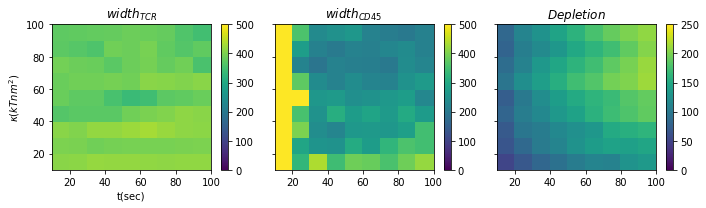

In [4]:
t = np.linspace(0, 100, 11)
k = np.linspace(5, 100, 20)

# select indices
selekted_t_inds = np.arange(1,11,1)
selekted_k_inds = np.arange(1,20,2)

st = t[selekted_t_inds]
sk = k[selekted_k_inds]

wTCR_array1 = wTCR_array[selekted_k_inds,:]
wTCR_array2 = wTCR_array1[:,selekted_t_inds]

wCD45_array1 = wCD45_array[selekted_k_inds,:]
wCD45_array2 = wCD45_array1[:,selekted_t_inds]

dep_array1 = dep_array[selekted_k_inds,:]
dep_array2 = dep_array1[:,selekted_t_inds]

[t_array, k_array] = np.meshgrid(t[t0:],k[k0:])
[st_array, sk_array] = np.meshgrid(st,sk)

fig, ax1=plt.subplots(1,3, figsize=[10,3],sharey=True)

vmin0 = 0
vmax0 = 500
im0 = ax1[0].pcolor(st ,sk, wTCR_array2, vmin=vmin0, vmax=vmax0)
# ax1[0].contour(st ,sk, w_TCR_array2, vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax1[0])
ax1[0].set_title("$width_{TCR}$")
ax1[0].set_xlabel("t(sec)")
ax1[0].set_ylabel("$\kappa(kTnm^2)$")

vmin1 = 0
vmax1 = 500
im1 = ax1[1].pcolor(st ,sk, wCD45_array2, vmin=vmin1, vmax=vmax1)
# ax1[1].contour(st ,sk, w_CD45_array2, vmin=vmin1, vmax=vmax1, colors='w')
fig.colorbar(im1, ax=ax1[1])
ax1[1].set_title('$width_{CD45}$')

vmin2 = 0
vmax2 = 250
im2 = ax1[2].pcolor(st ,sk, dep_array2, vmin=vmin2, vmax=vmax2)
# ax1[2].contour(st ,sk, dep_array2, vmin=vmin2, vmax=vmax2, colors='w')
fig.colorbar(im2, ax=ax1[2])
ax1[2].set_title('$Depletion$')

plt.tight_layout()

NameError: ignored

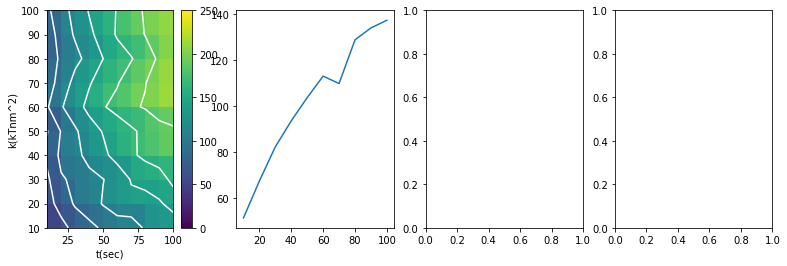

In [5]:
# rv_k_dep_center_KS	-13.529	
# rv_t_dep_center_KS	30.077	
# rv_sig_ratio_dep_KS	0.593	
# rv_min_dep_KS	-78.018	
# rv_max_dep_KS	160.411	
# rv_k_dep_divisor_KS	20.568	
# rv_t_dep_divisor_KS	29.280	


xx1 = st
# min1 = -80
# max1 = 140
cen1 = 30.077
dev1 = 29.280 # 30
# sig1 = min1 + (max1-min1)/(1 + np.exp(-(xx1-cen1)/dev1))

xx2 = sk
# min2 = -78.018
# max2 = 90 #180
cen2 = -13.529 # 0
dev2 = 20.568 # 25
# sig2 = min2 + (max2-min2)/(1 + np.exp(-(xx2-cen2)/dev2))

min = -78.018 # -80
max = 160.411 # 140
a_sig = 0.593
###
# sig1_array = min1 + (max1-min1)/(1 + np.exp(-(st_array-cen1)/dev1))
# sig2_array = min2 + (max2-min2)/(1 + np.exp(-(sk_array-cen2)/dev2))
sig01 = 1/(1 + np.exp(-(st_array-cen1)/dev1))
sig02 = 1/(1 + np.exp(-(sk_array-cen2)/dev2))

sig_array = min + (max-min)*(sig01 + a_sig*sig02)
###############################################
fig, ax0 = plt.subplots(1,4, figsize=[13,4])
vmin0 = 0
vmax0 = 250
im0 = ax0[0].pcolor(st, sk, dep_array2, vmin=vmin0, vmax=vmax0)
ax0[0].contour(st, sk, dep_array2, colors='w')
fig.colorbar(im0, ax=ax0[0])
ax0[0].set_xlabel('t(sec)')
ax0[0].set_ylabel('k(kTnm^2)')

ax0[1].plot(st, dep_array2[0,:])
ax0[1].plot(st, sig1)

ax0[2].plot(sk, dep_array2[:,0])
ax0[2].plot(sk, sig2)

# combined_array = decay_length_array*depletion_array/1000

# im1 = ax0[3].pcolor(st, sk, 0.55*(2*sig1_array + 1.5*sig2_array),
# vmin=vmin0, vmax=vmax0)
im1 = ax0[3].pcolor(st, sk, sig_array, vmin=vmin0, vmax=vmax0) #,
# vmin=vmin0, vmax=vmax0)

fig.colorbar(im1, ax=ax0[3])
# ax0[3].contour(st, sk, 0.5*(2*sig1_array + 1.5*sig2_array), colors='w')
ax0[3].contour(st, sk, sig_array, vmin=vmin0, vmax=vmax0, colors='w')
plt.tight_layout()

In [8]:

# untrained values of random variables (rv):
### wTCR:
# slope_t, HalfNormal:
sd_rv_slope_t_wTCR_KS1 = 1
# slope_k, HalfNormal:
sd_rv_slope_k_wTCR_KS1 = 1
# intercept, Normal:
mu_rv_intercept_wTCR_KS1 = 500
sd_rv_intercept_wTCR_KS1 = 100
# noise, HalfNormal:
sd_rv_noise_wTCR_KS1 = 50

### wCD45:
# slope_t, HalfNormal:
sd_rv_slope_t_wCD45_KS1 = 1
# slope_k, HalfNormal:
sd_rv_slope_k_wCD45_KS1 = 1
# intercept, Normal:
mu_rv_intercept_wCD45_KS1 = 500
sd_rv_intercept_wCD45_KS1 = 100
# noise, HalfNormal:
sd_rv_noise_wCD45_KS1 = 50

### dep:
# center_t, Normal:
mu_rv_center_t_dep_KS1 = 30
sd_rv_center_t_dep_KS1 = 10
# center_t_dep_distribution = \
# pm.Normal.dist(mu=mu_rv_center_t_dep_KS1, 
#                sd=sd_rv_center_t_dep_KS1)
# center_t_dep_distribution.dist()

# devisor_t, TruncatedNormal:
mu_rv_divisor_t_dep_KS1 = 30
sd_rv_divisor_t_dep_KS1 = 10
lower_rv_divisor_t_dep_KS1 = 0
upper_rv_divisor_t_dep_KS1 = None

# center_k, Normal:
mu_rv_center_k_dep_KS1 = 0
sd_rv_center_k_dep_KS1 = 20

# devisor_k, TruncatedNormal:
mu_rv_divisor_k_dep_KS1 = 25
sd_rv_divisor_k_dep_KS1 = 10
lower_rv_divisor_k_dep_KS1 = 0
upper_rv_divisor_k_dep_KS1 = None

# min, TruncatedNormal:
mu_rv_min_dep_KS1 = -80
sd_rv_min_dep_KS1 = 20
lower_rv_min_dep_KS1 = None
upper_rv_min_dep_KS1 = 0

# max, TruncatedNormal:
mu_rv_max_dep_KS1 = 100
sd_rv_max_dep_KS1 = 20
lower_rv_max_dep_KS1 = 20
upper_rv_max_dep_KS1 = None

# sigRatio, Normal:
mu_rv_sigRatio_dep_KS1 = 0
sd_rv_sigRatio_dep_KS1 = 1

# noise, HalfNormal:
sd_rv_noise_dep_KS1 = 50


In [7]:
# mu_rv_center_t_dep_KS1 = 30
# sd_rv_center_t_dep_KS1 = 10
# center_t_dep_distribution = \
# pm.Normal.dist(mu=mu_rv_center_t_dep_KS1, 
#                sd=sd_rv_center_t_dep_KS1)
# center_t_dep_distribution.dist()

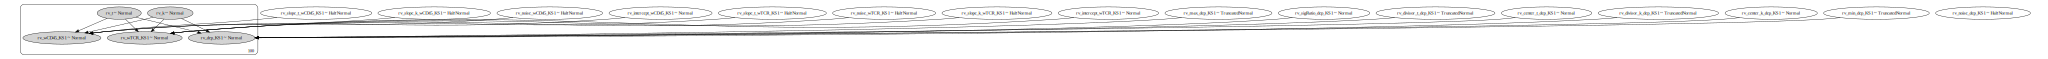

In [9]:
def get_model1_untrained(t_array, k_array, 
    wTCR_array, wCD45_array, dep_array): #dm_CD45_KS_obs
    '''
    TODO: add proper documentation

    '''
    model1 = pm.Model()
    with model1:
        ### model1 - KS (kinetic segregation) ###########################    
        
        t_input = st_array.reshape(-1)
        k_input = sk_array.reshape(-1)
        # rv_t = pm.Uniform('rv_t', 0, 100, observed=t_input)
        # rv_k = pm.Uniform('rv_k', 0, 100, observed=k_input)
        rv_t = pm.Normal('rv_t', mu = 70, sd = 30, observed = t_input)
        rv_k = pm.Normal('rv_k', mu = 50, sd = 20, observed = k_input)

        
        # wTCR_KS ####################################################
        wTCR_KS1_obs = wTCR_array2.reshape(-1)
        # rv_***_t_wTCR_KS1
        rv_slope_t_wTCR_KS1 = pm.HalfNormal('rv_slope_t_wTCR_KS1', 
                                             sd = sd_rv_slope_t_wTCR_KS1) # surface t slope
        # rv_***_k_wTCR_KS1
        rv_slope_k_wTCR_KS1 = pm.HalfNormal('rv_slope_k_wTCR_KS1', 
                                             sd = sd_rv_slope_k_wCD45_KS1) # surface k slope
        
        rv_intercept_wTCR_KS1 = pm.Normal('rv_intercept_wTCR_KS1', 
                                           mu = mu_rv_intercept_wCD45_KS1,
                                           sd = sd_rv_intercept_wCD45_KS1) # surface intercept

        rv_noise_wTCR_KS1 = pm.HalfNormal('rv_noise_wTCR_KS1', 
                                           sd = sd_rv_noise_wCD45_KS1) # noise 
        
        rv_wTCR_KS1 = pm.Normal('rv_wTCR_KS1', mu = rv_intercept_wTCR_KS1 +\
                                 rv_slope_t_wTCR_KS1*rv_t +\
                                 rv_slope_k_wTCR_KS1*rv_k,
                                 sd = rv_noise_wTCR_KS1, 
                                 observed = wTCR_KS1_obs) #

        
        # wCD45_KS ####################################################
        wCD45_KS1_obs = wCD45_array2.reshape(-1)
        # rv_***_t_wCD45_KS1
        rv_slope_t_wCD45_KS1 = pm.HalfNormal('rv_slope_t_wCD45_KS1', 
                                              sd = sd_rv_slope_t_wCD45_KS1) # surface t slope
        # rv_***_k_wCD45_KS1
        rv_slope_k_wCD45_KS1 = pm.HalfNormal('rv_slope_k_wCD45_KS1', 
                                              sd = sd_rv_slope_k_wCD45_KS1) # surface k slope
        # rv_***_wCD45_KS1
        rv_intercept_wCD45_KS1 = pm.Normal('rv_intercept_wCD45_KS1', 
                                           mu = mu_rv_intercept_wCD45_KS1, 
                                           sd = sd_rv_intercept_wCD45_KS1) # surface intercept

        rv_noise_wCD45_KS1 = pm.HalfNormal('rv_noise_wCD45_KS1', 
                                            sd = sd_rv_noise_wCD45_KS1) # noise 
        # rv_wCD45_KS1, equation:
        rv_wCD45_KS1 = pm.Normal('rv_wCD45_KS1', mu = rv_intercept_wCD45_KS1 +\
                                   rv_slope_t_wCD45_KS1*rv_t +\
                                   rv_slope_k_wCD45_KS1*rv_k,
                                   sd = rv_noise_wCD45_KS1,
                                   observed=wCD45_KS1_obs) #

        #################################################################
        # dep_KS ####################################################
        dep_KS1_obs = dep_array2.reshape(-1)
        # rv_variableName_parameterName_heatmapName_modelNameModelIndex:
        # rv_***_t_dep_KS1
        rv_center_t_dep_KS1 = pm.Normal('rv_center_t_dep_KS1',
                                         mu = mu_rv_center_t_dep_KS1, 
                                         sd = sd_rv_center_t_dep_KS1)
        
        rv_divisor_t_dep_KS1 = pm.TruncatedNormal('rv_divisor_t_dep_KS1',
                                                   mu = mu_rv_divisor_t_dep_KS1,
                                                   sd = sd_rv_divisor_t_dep_KS1,
                                                   lower = lower_rv_divisor_t_dep_KS1,
                                                   upper = upper_rv_divisor_t_dep_KS1)
        # rv_***_k_dep_KS1
        rv_center_k_dep_KS1 = pm.Normal('rv_center_k_dep_KS1',
                                         mu = mu_rv_center_k_dep_KS1, 
                                         sd = sd_rv_center_k_dep_KS1)
        
        rv_divisor_k_dep_KS1 = pm.TruncatedNormal('rv_divisor_k_dep_KS1',
                                                   mu = mu_rv_divisor_k_dep_KS1, 
                                                   sd = sd_rv_divisor_k_dep_KS1,
                                                   lower = lower_rv_divisor_k_dep_KS1,
                                                   upper = upper_rv_divisor_k_dep_KS1)
        # 
        rv_min_dep_KS1 = pm.TruncatedNormal('rv_min_dep_KS1',
                                             mu = mu_rv_min_dep_KS1,
                                             sd = sd_rv_min_dep_KS1,
                                             lower = lower_rv_min_dep_KS1,
                                             upper = upper_rv_min_dep_KS1)
        # 
        rv_max_dep_KS1 = pm.TruncatedNormal('rv_max_dep_KS1',
                                             mu = mu_rv_max_dep_KS1,
                                             sd = sd_rv_max_dep_KS1,
                                             lower = lower_rv_max_dep_KS1,
                                             upper = upper_rv_max_dep_KS1)
        # 
        rv_sigRatio_dep_KS1 = pm.Normal('rv_sigRatio_dep_KS1',
                                         mu = mu_rv_sigRatio_dep_KS1,
                                         sd = sd_rv_sigRatio_dep_KS1)
        
        rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1', sd=50) # noise 
        ###
        rv_tmp_x2 = (rv_t - rv_center_t_dep_KS1) / rv_divisor_t_dep_KS1
        rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

        rv_tmp_x1 = (rv_k - rv_center_k_dep_KS1) / rv_divisor_k_dep_KS1
        rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
        ###
        # rv_dep_KS1, equation:
        rv_dep_KS1 = pm.Normal('rv_dep_KS1', mu = rv_min_dep_KS1 +\
                                  (rv_max_dep_KS1 - rv_min_dep_KS1)*\
                                  rv_tmp_sig1 + rv_sigRatio_dep_KS1*rv_tmp_sig2,
                                  sd = sd_rv_noise_dep_KS1, observed=dep_KS1_obs)
        #################################################################
    return model1

model1= get_model1_untrained(t_array, k_array, 
    wTCR_array, wCD45_array, dep_array) #dm_CD45_KS_obs
gv1 = pm.model_to_graphviz(model1)
gv1   

In [10]:
with model1:
    trace1 = pm.sample(2000, chains=4);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_noise_dep_KS1, rv_sigRatio_dep_KS1, rv_max_dep_KS1, rv_min_dep_KS1, rv_divisor_k_dep_KS1, rv_center_k_dep_KS1, rv_divisor_t_dep_KS1, rv_center_t_dep_KS1, rv_noise_wCD45_KS1, rv_intercept_wCD45_KS1, rv_slope_k_wCD45_KS1, rv_slope_t_wCD45_KS1, rv_noise_wTCR_KS1, rv_intercept_wTCR_KS1, rv_slope_k_wTCR_KS1, rv_slope_t_wTCR_KS1]
Sampling chain 3, 0 divergences: 100%|██████████| 2500/2500 [00:23<00:00, 105.81it/s]
The acceptance probability does not match the target. It is 0.8937494713653765, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9120124445798262, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9213226073470496, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

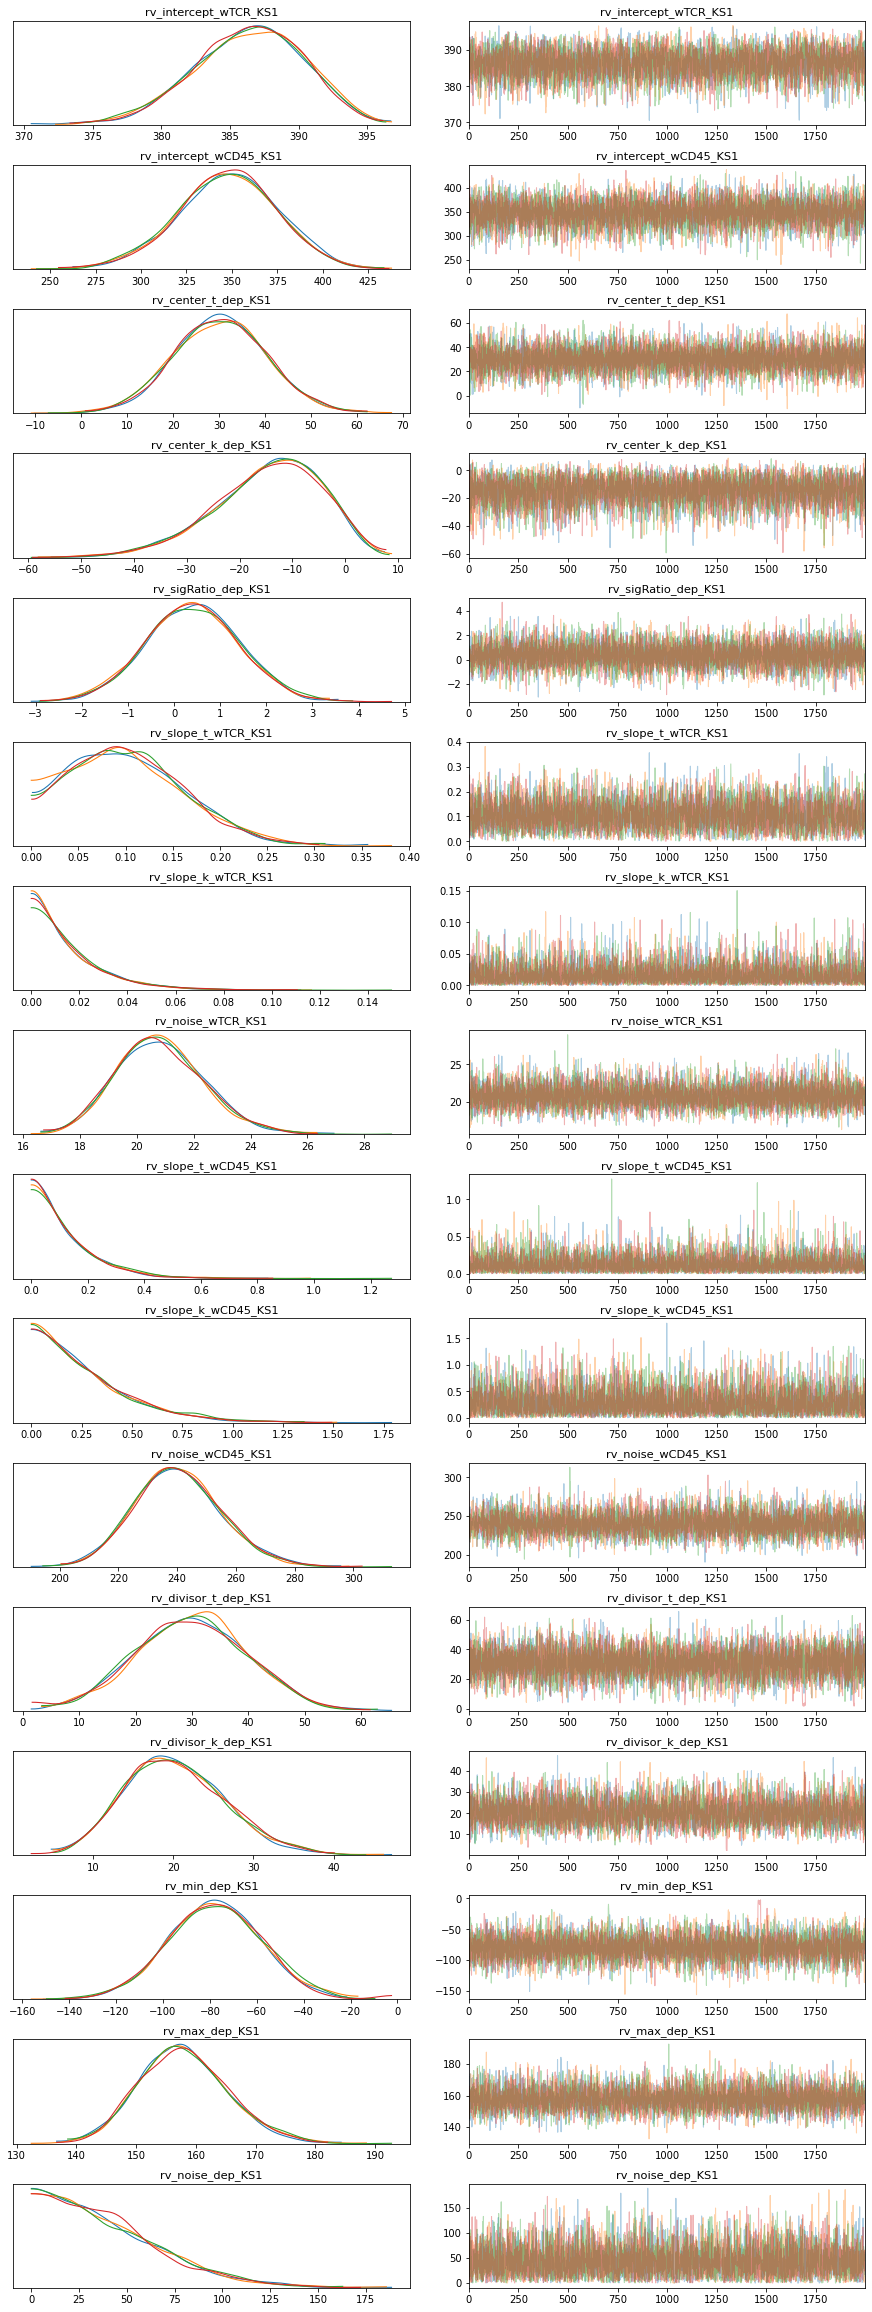

In [11]:
pm.traceplot(trace1);

Getting mean values from 'trace': 

In [ ]:
mean_rv_slope_t_wTCR_KS1 = trace1.rv_slope_t_wTCR_KS1.mean()
mean_rv_slope_k_wTCR_KS1 = trace1.rv_slope_k_wTCR_KS1.mean()
mean_rv_intercept_wTCR_KS1 = trace1.rv_intercept_wTCR_KS1.mean()
mean_rv_noise_wTCR_KS1 = trace1.rv_noise_wTCR_KS1.mean()

mean_rv_slope_t_wCD45_KS1 = trace1.rv_slope_t_wCD45_KS1.mean()
mean_rv_slope_k_wCD45_KS1 = trace1.rv_slope_k_wCD45_KS1.mean()
mean_rv_intercept_wCD45_KS1 = trace1.rv_intercept_wCD45_KS1.mean()
mean_rv_noise_wCD45_KS1 = trace1.rv_noise_wCD45_KS1.mean()

mean_rv_center_t_dep_KS1 = trace1.rv_center_t_dep_KS1.mean()
mean_rv_divisor_t_dep_KS1 = trace1.rv_divisor_t_dep_KS1.mean()
mean_rv_center_k_dep_KS1 = trace1.rv_center_k_dep_KS1.mean()
mean_rv_divisor_k_dep_KS1 = trace1.rv_divisor_k_dep_KS1.mean()	
mean_rv_sigRatio_dep_KS1 = trace1.rv_sigRatio_dep_KS1.mean()	
mean_rv_min_dep_KS1 = trace1.rv_min_dep_KS1.mean()	
mean_rv_max_dep_KS1 = trace1.rv_max_dep_KS1.mean()	
mean_rv_noise_dep_KS1 = trace1.rv_noise_dep_KS1.mean()


Once the 'trace' is given, its 'summary' can be saved and all following operations can be done on the saved 'trace_summary', (trace_summary = pm.summary(trace)).

Getting 'mean' and 'sd' values from 'trace_summary':

In [12]:
trace1_summary = pm.summary(trace1).round(3) # var_names=["mu", "tau"]
trace1_summary.to_pickle('trace1_summary')
# files.download("trace1_summary") 
!ls

sample_data  trace1_summary


Read from saved (pickled) trace summary:

In [23]:
# r = read, to distinguish between the original and the saved files.
trace1_summary_r = pd.read_pickle('trace1_summary') 

# displaying the rv names and the data of intersest: 'mean' and 'sd':
mean_sd_r = trace1_summary_r.loc[:, ['mean','sd']]
mean_sd_r

mean      sd
rv_intercept_wTCR_KS1   386.326   3.993
rv_intercept_wCD45_KS1  347.032  27.166
rv_center_t_dep_KS1      30.131  10.015
rv_center_k_dep_KS1     -14.788  10.164
rv_sigRatio_dep_KS1       0.387   1.000
rv_slope_t_wTCR_KS1       0.103   0.060
rv_slope_k_wTCR_KS1       0.016   0.016
rv_noise_wTCR_KS1        20.807   1.529
rv_slope_t_wCD45_KS1      0.123   0.118
rv_slope_k_wCD45_KS1      0.273   0.239
rv_noise_wCD45_KS1      240.181  14.512
rv_divisor_t_dep_KS1     29.812   9.890
rv_divisor_k_dep_KS1     20.214   6.201
rv_min_dep_KS1          -77.960  19.951
rv_max_dep_KS1          157.852   7.305
rv_noise_dep_KS1         39.913  30.321

In [65]:
# create mean rv names:
mean_rv_names_model1 = np.array('mean_' + trace1_summary_r.index[:])
# get mean rv values:
mean_rv_values_model1 = np.array(trace1_summary_r.loc[:,'mean'].values)
# create sd rv names:
sd_rv_names_model1 = np.array('sd_' + trace1_summary_r.index[:])
# get sd rv values:
sd_rv_values_model1 = np.array(trace1_summary_r.loc[:,'sd'].values)

# concatenate mean and sd names:
rv_names_model1 = np.concatenate((mean_rv_names_model1,sd_rv_names_model1))
# concatenate mean and sd values:
rv_values_model1 = np.concatenate((mean_rv_values_model1,sd_rv_values_model1))

# making dictionary for {names:values}
dict_rv_model1 = dict(zip(rv_names_model1,rv_values_model1))
# dict_rv_model1

In [61]:
# 
mean_rv_slope_t_wTCR_KS1 = dict_rv_model1["mean_rv_slope_t_wTCR_KS1"]
mean_rv_slope_k_wTCR_KS1 = dict_rv_model1["mean_rv_slope_k_wTCR_KS1"]
mean_rv_intercept_wTCR_KS1 = dict_rv_model1["mean_rv_intercept_wTCR_KS1"]
mean_rv_noise_wTCR_KS1 = dict_rv_model1["mean_rv_noise_wTCR_KS1"]

mean_rv_slope_t_wCD45_KS1 = dict_rv_model1["mean_rv_slope_t_wCD45_KS1"]
mean_rv_slope_k_wCD45_KS1 = dict_rv_model1["mean_rv_slope_k_wCD45_KS1"]
mean_rv_intercept_wCD45_KS1 = dict_rv_model1["mean_rv_intercept_wCD45_KS1"]
mean_rv_noise_wCD45_KS1 = dict_rv_model1["mean_rv_noise_wCD45_KS1"]

mean_rv_center_t_dep_KS1 = dict_rv_model1["mean_rv_center_t_dep_KS1"]
mean_rv_divisor_t_dep_KS1 = dict_rv_model1["mean_rv_divisor_t_dep_KS1"]
mean_rv_center_k_dep_KS1 = dict_rv_model1["mean_rv_center_k_dep_KS1"]
mean_rv_divisor_k_dep_KS1 = dict_rv_model1["mean_rv_divisor_k_dep_KS1"]
mean_rv_sigRatio_dep_KS1 = dict_rv_model1["mean_rv_sigRatio_dep_KS1"]	
mean_rv_min_dep_KS1 = dict_rv_model1["mean_rv_min_dep_KS1"]
mean_rv_max_dep_KS1 = dict_rv_model1["mean_rv_max_dep_KS1"]
mean_rv_noise_dep_KS1 = dict_rv_model1["mean_rv_noise_dep_KS1"]


In [43]:
# rv_ind = 0
# rv_name = trace1_summary_r.index[rv_ind]
# print(rv_name)
# rv_mean_name = trace1_summary_r.loc[rv_name, 'mean']
# rv_sd_name = trace1_summary_r.loc[rv_name, 'sd']

# rv_mean_value = trace1_summary_r.loc[rv_name, 'mean']
# rv_sd_value = trace1_summary_r.loc[rv_name, 'sd']
# rv_mean_value
# mean_sd_r = trace1_summary_r.loc[:, ['mean','sd']]
# mean_sd_r

rv_intercept_wTCR_KS1


386.326

In [ ]:
wTCR_KS1_validation = mean_rv_intercept_wTCR_KS1 +\
                  mean_rv_slope_t_wTCR_KS1*st_array +\
                  mean_rv_slope_k_wTCR_KS1*sk_array

wCD45_KS1_validation = mean_rv_intercept_wCD45_KS1 +\
                  mean_rv_slope_t_wCD45_KS1n*st_array +\
                  mean_rv_slope_k_wCD45_KS1*sk_array

rv_tmp_x1 = (sk_array - mean_rv_center_k_dep_KS1) / mean_rv_divisor_k_dep_KS1
rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
        
rv_tmp_x2 = (st_array - mean_rv_center_t_dep_KS1) / mean_rv_divisor_t_dep_KS1
rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

dep_KS1_validation = mean_rv_min_dep_KS1 +\
 (rv_max_dep_KS1_mean - mean_rv_min_dep_KS1n)*\
 (rv_tmp_sig1 + mean_rv_sigRatio_dep_KS1*rv_tmp_sig2)


In [ ]:
### plot #######################################################################
fig, ax0 = plt.subplots(3,2, figsize=[7, 9.5], sharex=True, sharey=True)

vmin11 = 0; vmax11 = 500
im1 = ax0[0,0].pcolor(st, sk, wTCR_array2, vmin=vmin11, vmax=vmax11)
ax0[0,0].contour(st, sk, wTCR_array2, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im1, ax=ax0[0,0]) 
ax0[0,0].set_title('$w_{TCR}^{KS}$, Evidence)')
ax0[0,0].set_xlabel('$t^{KS}(sec)$')
ax0[0,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')

im4 = ax0[0,1].pcolor(st, sk, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11)
ax0[1,0].contour(st, sk, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax0[0,1])
ax0[0,1].set_title('$w_{TCR}^{KS}$,Validation')
ax0[0,1].set_xlabel('$t^{KS}(sec)$')
ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
vmin22 = 0; vmax22 = 500
im2 = ax0[1,0].pcolor(st, sk, wCD45_array2, vmin=vmin22, vmax=vmax22)
ax0[1,0].contour(st, sk, wCD45_array2, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im1, ax=ax0[1,0])
ax0[1,0].set_title('$w_{CD45}^{KS}$, Evidence')
ax0[1,0].set_xlabel('$t^{KS}(sec)$')
ax0[1,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im5 = ax0[1,1].pcolor(st, sk, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22)
ax0[1,1].contour(st, sk, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im5, ax=ax0[1,1])
ax0[1,1].set_title('$w_{CD45}^{KS}$, Validation')
ax0[1,1].set_xlabel('$t^{KS}(sec)$')
ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
vmin12 = 0; vmax12 = 250
im3 = ax0[2,0].pcolor(st, sk, dep_array2, vmin=vmin12, vmax=vmax12)
ax0[2,0].contour(st, sk, dep_array2, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im3, ax=ax0[2,0]) # cbarlabel="nm]"
ax0[2,0].set_title('$Dep^{KS}$, Evidence')
ax0[2,0].set_xlabel('$t^{KS}(sec)$')
ax0[2,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im6 = ax0[2,1].pcolor(st, sk, dep_KS1_validation, vmin=vmin12, vmax=vmax12)
ax0[2,1].contour(st, sk, dep_KS1_validation, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax0[2,1])
ax0[2,1].set_title('$Dep^{KS}$, Validation')
ax0[2,1].set_xlabel('$t^{KS}(sec)$')
ax0[2,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

plt.tight_layout();                            


In [ ]:
def get_model1_trained(trace1, observed_t= None, observed_k= None):
    ''' return model1 trained based on trace1. 
    If observed_t and/or observed_k are specified, 
    return the model conditioned on those values '''
    model1_trained = pm.Model()
    with model1_trained:
        ### model1 - KS (kinetic segregation) ###########################    
        #  #####################################################
        
        rv_t = pm.Normal('rv_t', mu=70, sd=30, observed= observed_t)
        rv_k = pm.Normal('rv_k', mu=50, sd=20, observed= observed_k)

        # dw_TCR_KS ####################################################
        
        w_TCR_KS_obs = w_TCR_array.reshape(-1)
        rv_at_w_TCR_KS = pm.HalfNormal('rv_at_w_TCR_KS',
                                         sd= trace1.rv_at_w_TCR_KS.mean()) # surface t slope
        rv_ak_w_TCR_KS = pm.HalfNormal('rv_ak_w_TCR_KS', 
                                         sd= trace1.rv_ak_w_TCR_KS.mean()) # surface k slope
        rv_b_w_TCR_KS = pm.Normal('rv_b_w_TCR_KS', 
                                    mu= trace1.rv_b_w_TCR_KS.mean(), 
                                    sd= trace1.rv_b_w_TCR_KS.std()) # surface intercept
        rv_noise_w_TCR_KS = pm.HalfNormal('rv_noise_w_TCR_KS', 
                                            sd= trace1.rv_noise_w_TCR_KS.std()) # noise 
        
        rv_w_TCR_KS = pm.Normal('rv_w_TCR_KS',
                                  mu=rv_b_w_TCR_KS +\
                                  rv_at_w_TCR_KS*rv_t + rv_ak_w_TCR_KS*rv_k,
                                  sd=rv_noise_w_TCR_KS) #

        ##############################################################
        # w_CD45_KS ####################################################
        
        w_CD45_KS_obs = w_CD45_array.reshape(-1)
        rv_at_w_CD45_KS = pm.HalfNormal('rv_at_w_CD45_KS',
                                         sd= trace1.rv_at_w_CD45_KS.mean()) # surface t slope
        rv_ak_w_CD45_KS = pm.HalfNormal('rv_ak_w_CD45_KS', 
                                         sd= trace1.rv_ak_w_CD45_KS.mean()) # surface k slope
        rv_b_w_CD45_KS = pm.Normal('rv_b_w_CD45_KS', 
                                    mu= trace1.rv_b_w_CD45_KS.mean(), 
                                    sd= trace1.rv_b_w_CD45_KS.std()) # surface intercept
        rv_noise_w_CD45_KS = pm.HalfNormal('rv_noise_w_CD45_KS', 
                                            sd= trace1.rv_noise_w_CD45_KS.std()) # noise 
        
        rv_w_CD45_KS = pm.Normal('rv_w_CD45_KS',
                                  mu=rv_b_w_CD45_KS +\
                                  rv_at_w_CD45_KS*rv_t + rv_ak_w_CD45_KS*rv_k,
                                  sd=rv_noise_w_CD45_KS) #

        ##############################################################
        # dep_KS ####################################################
        dep_KS_obs = dep_array2.reshape(-1)

        rv_noise_dep_KS = pm.HalfNormal('rv_noise_dep_KS',
                                        sd=trace1.rv_noise_dep_KS.mean())

        rv_min_dep_KS = pm.TruncatedNormal('rv_min_dep_KS',
                                           mu = trace1.rv_min_dep_KS.mean(),
                                           sd = trace1.rv_min_dep_KS.std(),
                                           upper = 0)
        rv_max_dep_KS = pm.TruncatedNormal('rv_max_dep_KS',
                                           mu = trace1.rv_max_dep_KS.mean(),
                                           sd = trace1.rv_max_dep_KS.std(),
                                           lower = 20)
        rv_k_dep_center_KS = pm.Normal('rv_k_dep_center_KS',
                                       mu = trace1.rv_k_dep_center_KS.mean(), 
                                       sd = trace1.rv_k_dep_center_KS.std())
        rv_k_dep_divisor_KS = pm.TruncatedNormal('rv_k_dep_divisor_KS',
                                                 mu = trace1.rv_k_dep_divisor_KS.mean(), 
                                                 sd = trace1.rv_k_dep_divisor_KS.std(),
                                                 lower = 0)
        rv_t_dep_center_KS = pm.Normal('rv_t_dep_center_KS',
                                       mu = trace1.rv_t_dep_center_KS.mean(), 
                                       sd = trace1.rv_t_dep_center_KS.std())
        rv_t_dep_divisor_KS = pm.TruncatedNormal('rv_t_dep_divisor_KS',
                                                 mu = trace1.rv_t_dep_divisor_KS.mean(),
                                                 sd = trace1.rv_t_dep_divisor_KS.std(),
                                                 lower = 0)
        rv_sig_ratio_dep_KS = pm.Normal('rv_sig_ratio_dep_KS',
                                        mu = trace1.rv_sig_ratio_dep_KS.mean(),
                                        sd = trace1.rv_sig_ratio_dep_KS.std())

        rv_tmp_x1 = (rv_k - rv_k_dep_center_KS) / rv_k_dep_divisor_KS
        rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
        
        rv_tmp_x2 = (rv_t - rv_t_dep_center_KS) / rv_t_dep_divisor_KS
        rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

        rv_dep_KS = pm.Normal('rv_dep_KS', mu=rv_min_dep_KS +\
                                  (rv_max_dep_KS - rv_min_dep_KS)*\
                                  rv_tmp_sig1 + rv_sig_ratio_dep_KS*rv_tmp_sig2,
                                  sd=rv_noise_dep_KS)        

    return model1_trained

model1_trained= get_model1_trained(trace1)
gv1 = pm.model_to_graphviz(model1_trained)
display(gv1)

In [ ]:
n_t = 10 #11
n_k = 10 #11
Ts = np.linspace(10,100, n_t)
Ks = np.linspace(10,100, n_k)
# w_TCRs_mean = np.zeros((n_k, n_t))
# w_TCRs_std = np.zeros((n_k, n_t))
# w_CD45s_mean = np.zeros((n_k, n_t))
# w_CD45s_std = np.zeros((n_k, n_t))
deps_mean = np.zeros((n_k, n_t))
deps_std = np.zeros((n_k, n_t))

# logger = logging.getLogger("pymc3")
# logger.propagate = False
for i,k in enumerate(Ks):
    for j,t in enumerate(Ts):
        cur_model= get_model1_trained(trace1, observed_k= k, observed_t= t)
        with cur_model:
            cur_trace = pm.sample(2000, chains=4, progressbar = False);
        print(f"i,t={i,t}, j,k={j,k}")
        # w_TCRs_mean[i,j] = cur_trace.rv_w_TCR_KS.mean() 
        # w_TCRs_std[i,j] = cur_trace.rv_w_TCR_KS.std();
        # w_CD45s_mean[i,j] = cur_trace.rv_w_CD45_KS.mean() 
        # w_CD45s_std[i,j] = cur_trace.rv_w_CD45_KS.std();
        deps_mean[i,j] = cur_trace.rv_dep_KS.mean() 
        deps_std[i,j] = cur_trace.rv_dep_KS.std();


In [ ]:
# np.save("trained_w_TCR_KS_mean_10x10_20004", w_TCRs_mean)
# np.save("trained_w_TCR_KS_std_10x10_20004", w_TCRs_std)
# np.save("trained_w_CD45_KS_mean_10x10_20004", w_CD45s_mean)
# np.save("trained_w_CD45_KS_std_10x10_20004", w_CD45s_std)
np.save("trained_dep_KS_mean_10x10_20004", deps_mean)
np.save("trained_dep_KS_std_10x10_20004", deps_std)
!ls

In [ ]:
# from google.colab import files
# files.download("trained_w_TCR_KS_mean_10x10_20004.npy") # Download locally from colab
# files.download("trained_w_TCR_KS_std_10x10_20004.npy")
# files.download("trained_w_CD45_KS_mean_10x10_20004.npy") 
# files.download("trained_w_CD45_KS_std_10x10_20004.npy") 
files.download("trained_dep_KS_mean_10x10_20004.npy") 
files.download("trained_dep_KS_std_10x10_20004.npy") 



In [ ]:
# trainedw_TCR_KS_mean = np.load('trained_w_TCR_KS_mean_10x10.npy')
# trainedw_CD45_KS_mean = np.load('trained_w_CD45_KS_mean_10x10.npy')
# traineddep_KS_mean = np.load('trained_dep_KS_mean_10x10.npy')

fig, ax0 = plt.subplots(3,3, figsize=[10, 10], sharex=True, sharey=True)
"""
fig = plt.figure()
# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
plt.plot([1, 2, 3], [1, 2, 3])
# Adds a subplot at the 4th position
fig.add_subplot(2, 2, 4)
plt.plot([3, 2, 1], [1, 2, 3])
"""
vmin11 = 0; vmax11 = 500
# im0 = ax0[0,0].pcolor(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11)
# ax0[0,0].contour(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11, colors='w')
# fig.colorbar(im1, ax=ax0[0,0])
# ax0[0,0].set_title("$w_{TCR}^{KS}$, Evidence)")
# ax0[0,0].set_xlabel('$t^{KS}(sec)$')
# ax0[0,0].set_ylabel("$\kappa^{KS}(K_BT/nm)$")

# im2 = ax0[0,1].pcolor(st, sk, w_TCR_KS_validation, vmin=vmin11, vmax=vmax11)
# ax0[1,0].contour(t_array, k_array, w_TCR_KS_validation, vmin=vmin11, vmax=vmax11, colors='w')
# fig.colorbar(im2, ax=ax0[0,1])
# ax0[0,1].set_title("$w_{TCR}^{KS}$, Validation")
# ax0[0,1].set_xlabel('$t^{KS}(sec)$')
# ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

# im3 = ax0[0,2].pcolor(Ts, Ks, w_TCRs_mean, vmin=vmin11, vmax=vmax11)
# ax1[2,0].contour(Ts, Ks, w_TCR_KS_mean, vmin=vmin11, vmax=vmax11, colors='w')
# fig.colorbar(im3, ax=ax0[0,2])
# ax0[0,2].set_title("$w_{TCR}^{KS}$, TRained")
# ax1[0,2].set_xlabel("$t^{KS}(sec)$")
# ax1[0,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

# cbar_location="right"
# cbar_mode="single"
# cbar_size="7%"
# cbar_pad=0.15
# Colorbar
cbar_ax = fig.add_axes([1, 0.695, 0.01, 0.262])
fig.colorbar(im3, cax=cbar_ax)
##########################################################
vmin22 = 0; vmax22 = 500
# im4 = ax0[1,0].pcolor(st, sk, w_CD45_array2, vmin=vmin22, vmax=vmax22)
# ax0[1,0].contour(t_array, k_array, w_CD45_array, vmin=vmin22, vmax=vmax22, colors='w')
# fig.colorbar(im1, ax=ax0[1,0])
# ax0[1,0].set_title("$w_{CD45}^{KS}$, Evidence")
# ax0[1,0].set_xlabel('$t^{KS}(sec)$')
# ax0[1,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")


# im5 = ax0[1,1].pcolor(st, sk, w_CD45_KS_validation, vmin=vmin22, vmax=vmax22)
# ax0[1,1].contour(st, sk, w_CD45_KS_validation, vmin=vmin22, vmax=vmax22, colors='w')
# fig.colorbar(im4, ax=ax0[1,1])
# ax0[1,1].set_title("$w_{CD45}^{KS}$, Validation")
# ax0[1,1].set_xlabel('$t^{KS}(sec)$')
# ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

# im6 = ax0[1,2].pcolor(Ts, Ks, w_CD45s_mean, vmin=vmin22, vmax=vmax22)
# ax0[2,1].contour(Ts, Ks, w_CD45_KS_mean, vmin=vmin22, vmax=vmax22, colors='w')
# fig.colorbar(im6, ax=ax0[1,2])
# ax0[1,2].set_title("$w_{CD45}^{KS}$, Trained")
# ax0[1,2].set_xlabel("$t^{KS}(sec)$")
# ax0[1,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

cbar_ax = fig.add_axes([1, 0.38, 0.01, 0.262])
fig.colorbar(im6, cax=cbar_ax)
##########################################################
vmin12 = 0; vmax12 = 250
im7 = ax0[2,0].pcolor(st, sk, dep_array2, vmin=vmin12, vmax=vmax12)
# ax0[0,2].contour(st, sk, dep_array, vmin=vmin12, vmax=vmax12, colors='w')
# fig.colorbar(im3, ax=ax0[2,0]) # cbarlabel="nm]"
ax0[2,0].set_title('$Dep^{KS}$, Evidence')
ax0[2,0].set_xlabel('$t^{KS}(sec)$')
ax0[2,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im7 = ax0[2,1].pcolor(st, sk, dep_KS_validation, vmin=vmin12, vmax=vmax12)
# ax0[2,1].contour(st, sk, dep_KS_validation, vmin=vmin12, vmax=vmax12, colors='w')
# fig.colorbar(im6, ax=ax0[2,1])
ax0[2,1].set_title("$Dep^{KS}$, Validation")
ax0[2,1].set_xlabel("$t^{KS}(sec)$")
# ax0[2,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

im9 = ax0[2,2].pcolor(Ts, Ks, deps_mean, vmin=vmin12, vmax=vmax12)
# ax0[2,2].contour(Ts, Ks, dep_KS_mean, vmin=vmin12, vmax=vmax12, colors='w')
# fig.colorbar(im9, ax=ax0[2,2])
ax0[2,2].set_title("$Dep^{KS}$, Trained")
ax0[2,2].set_xlabel("$t^{KS}(sec)$")
# ax0[2,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

cbar_ax = fig.add_axes([1, 0.065, 0.01, 0.262])
fig.colorbar(im9, cax=cbar_ax)

plt.tight_layout();                  

#########################################################################        